In [3]:
import pandas as pd
#Read the csv file
data = pd.read_csv("data.csv")
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [48]:
#shows statastical description of data
data.describe()

,Duration,Pulse,Calories
count,169.000000,169.000000,169.000000
mean,63.846154,107.461538,375.544379
std,42.299949,14.510259,262.411685
min,15.000000,80.000000,50.000000
25%,45.000000,100.000000,253.000000
50%,60.000000,105.000000,321.000000
75%,60.000000,111.000000,384.000000
max,300.000000,159.000000,1860.000000


In [5]:
data.isnull().any()

Duration    False
Pulse       False
Calories    False
dtype: bool

In [56]:
#Replace the null values with the mean
data.fillna(data.mean(), inplace=True)
data.isnull().any()

Duration    False
Pulse       False
Calories    False
dtype: bool

In [61]:
data.loc[(data['Calories']>500)&(data['Calories']<1000)]
#Filter the dataframe to select the rows with calories values between 500 and 1000.

,Duration,Pulse,Calories
51,80,123,643
62,160,109,853
65,180,90,800
66,150,105,873
67,150,107,816
72,90,100,700
73,150,97,953
75,90,98,563
90,180,101,600
99,90,93,604


In [62]:
#Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
data.loc[(data['Calories']>500)&(data['Pulse']<100)]

,Duration,Pulse,Calories
65,180,90,800
70,150,97,1115
73,150,97,953
75,90,98,563
99,90,93,604
106,180,90,800


In [10]:
#Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
df_modified = data[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [11]:
#Delete the “Maxpulse” column from the main df dataframe
del data['Maxpulse']

In [12]:
data.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [13]:
data.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [14]:
import numpy as np

In [15]:
data['Calories'] = data['Calories'].astype(np.int64)
data.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

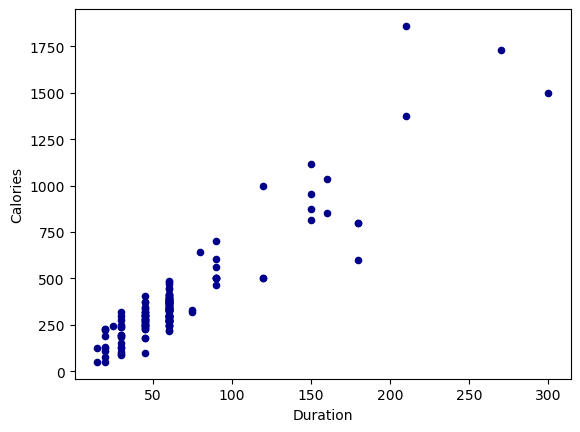

In [17]:
from matplotlib import pyplot as plot
data.plot.scatter(x='Duration',y='Calories',c='DarkBlue')

In [25]:
#1.Titanic dataset
import pandas as pd
#from matplotlib import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex']) #correlation is negative

-0.5433513806577526

In [35]:
# # Drop non-numeric columns from the dataframe
# df=df.drop(["Name", 'Sex','Ticket','Cabin','Embarked'], axis=1)
# #creating corelation matrix
# matrix = df.corr()
# print(matrix)

In [37]:
# df.corr().style.background_gradient(cmap="Greens")

In [40]:
#Naïve Bayes method of Titanic Dataset
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("train.csv")

# Select features and target
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

# Preprocess categorical variables
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.65%


In [41]:
#2.Glass Dataset
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [43]:
#visualization 1 of Glass Dataset
# glass.corr().style.background_gradient(cmap="Greens")

In [45]:
# sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
# plt.show()

In [46]:
#Naïve Bayes method of Glass Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)


Accuracy Score: 55.81%

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



In [47]:
#Linear SVM method of Glass Dataset
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
#To avoid warnings
warnings.filterwarnings("ignore")

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear SVM model
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)


Accuracy Score: 51.16%

Classification Report:
               precision    recall  f1-score   support

           1       0.37      1.00      0.54        11
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         3
           7       0.80      1.00      0.89         8

    accuracy                           0.51        43
   macro avg       0.36      0.46      0.38        43
weighted avg       0.34      0.51      0.38        43

